# Import software libraries and load the dataset #

In [1]:
import sys                             # Read system parameters.
import shutil
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets


# Load the dataset.
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))

4422102/4422102 [==============================] - 0s 0us/step
Loaded 60000 training records.
Loaded 10000 test records.


# Get acquainted with the dataset

In [2]:
print('Shape of feature space: {}\n'.format(X_train.shape))

Shape of feature space: (60000, 28, 28)



In [3]:
print('A few examples:\n')
print(X_train[0])

A few examples:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10):
    print('{} ({})'.format(class_names[i], np.unique(y_train)[i]))

T-shirt/top (0)
Trouser (1)
Pullover (2)
Dress (3)
Coat (4)
Sandal (5)
Shirt (6)
Sneaker (7)
Bag (8)
Ankle boot (9)


# Visualize the data examples

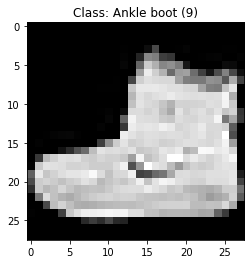

In [6]:
# Plot just first example for now.
plt.imshow(X_train[0], cmap = 'gray')
plt.title('Class: {} ({})'.format(class_names[y_train[0]], y_train[0]));

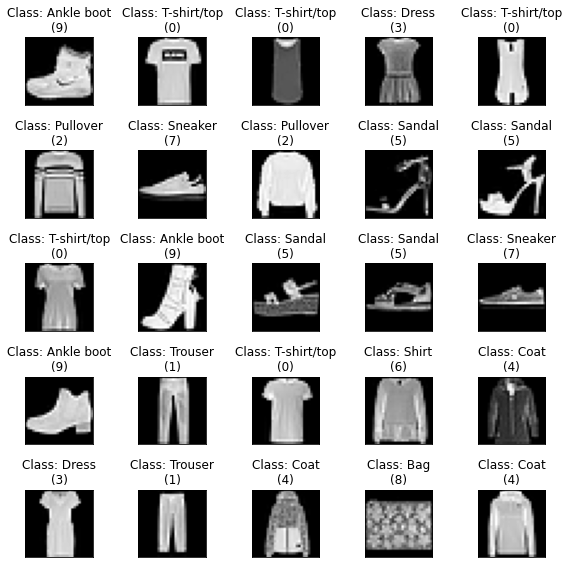

In [7]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (8, 8))

for i, ax in zip(range(25), axes.flatten()):
    ax.imshow(X_train[i,:,:], cmap = 'gray')  # Plot training example.
    ax.title.set_text('Class: {}\n({})'.format(class_names[y_train[i]], y_train[i]))

# Turn off axis ticks for readability.
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()

# Prepare the data for training with Keras

In [8]:
# Reshape arrays to add greyscale flag.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
from keras.utils import to_categorical

# One-hot encode the data for each label.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print('One-hot encoding for first image: {}'.format(y_train[0]))

One-hot encoding for first image: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Split the datasets

In [13]:
from sklearn.model_selection import train_test_split

# Split the training and validation datasets and their labels.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 50)

print(f'Training features:         {X_train.shape}')
print(f'Validation features:       {X_val.shape}')
print(f'Training labels:           {y_train.shape}')
print(f'Validation labels:         {y_val.shape}')

Training features:         (45000, 28, 28, 1)
Validation features:       (15000, 28, 28, 1)
Training labels:           (45000, 10)
Validation labels:         (15000, 10)


# Build the CNN structure

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import LeakyReLU

cnn = Sequential()

# Start stacking layers one-by-one.
cnn.add(Conv2D(filters = 32,
               kernel_size = (3, 3),  # First convolutional layer (32 output filters, 3x3 filter size).
               input_shape = (28, 28, 1),
               padding = 'same',
               activation = 'linear'))  # Will add leaky ReLU layer next.
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((7, 7), padding = 'same'))  # First pooling layer with 2x2 size.

cnn.add(Conv2D(64, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((7, 7), padding = 'same'))

cnn.add(Conv2D(128, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((7, 7), padding = 'same'))


cnn.add(Conv2D(256, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((7, 7), padding = 'same'))

cnn.add(Flatten())  # Connect convolution and dense layer.
cnn.add(Dense(10, activation = 'softmax'))  # Dense output layer with softmax activation.

print('The CNN structure has been built.')

# Compile the model and examine the layers

In [ ]:
cnn.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

cnn.summary()

In [ ]:
from keras.utils import plot_model
plot_model(cnn, show_shapes = True, to_file = 'model.png')

# Train the model

In [23]:
cnn_trained = cnn.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 5,
                      verbose = 1)

Epoch 1/12
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2587 - accuracy: 0.9032 - val_loss: 0.3215 - val_accuracy: 0.8831
Epoch 2/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2528 - accuracy: 0.9053 - val_loss: 0.3076 - val_accuracy: 0.8889
Epoch 3/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2437 - accuracy: 0.9086 - val_loss: 0.3224 - val_accuracy: 0.8869
Epoch 4/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2407 - accuracy: 0.9084 - val_loss: 0.3318 - val_accuracy: 0.8865
Epoch 5/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2365 - accuracy: 0.9120 - val_loss: 0.3286 - val_accuracy: 0.8849
Epoch 6/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2318 - accuracy: 0.9121 - val_loss: 0.3305 - val_accuracy: 0.8859
Epoch 7/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2271 - accuracy: 0.9151 - val_loss: 0.3191 - val_accuracy:

KeyboardInterrupt: ignored

# Evaluate the model on the test data

In [24]:
eval_test = cnn.evaluate(X_test, y_test, verbose = 0)

print('Loss: {}'.format(round(eval_test[0], 2)))
print('Accuracy: {:.0f}%'.format(eval_test[1] * 100))

Loss: 0.39
Accuracy: 88%


# Make predictions on the test data

In [25]:
prediction = cnn.predict(X_test)
prediction = np.argmax(np.round(prediction), axis = 1)  # Extract class number from one-hot-encoded array.
actual = np.argmax(np.round(y_test), axis = 1)

print('Actual class:    {}'.format(actual[:11]))
print('Predicted class: {}'.format(prediction[:11]))

313/313 [==============================] - 1s 2ms/step
Actual class:    [9 2 1 1 6 1 4 6 5 7 4]
Predicted class: [9 2 1 1 6 1 2 6 5 7 4]


# Visualize the predictions for several examples

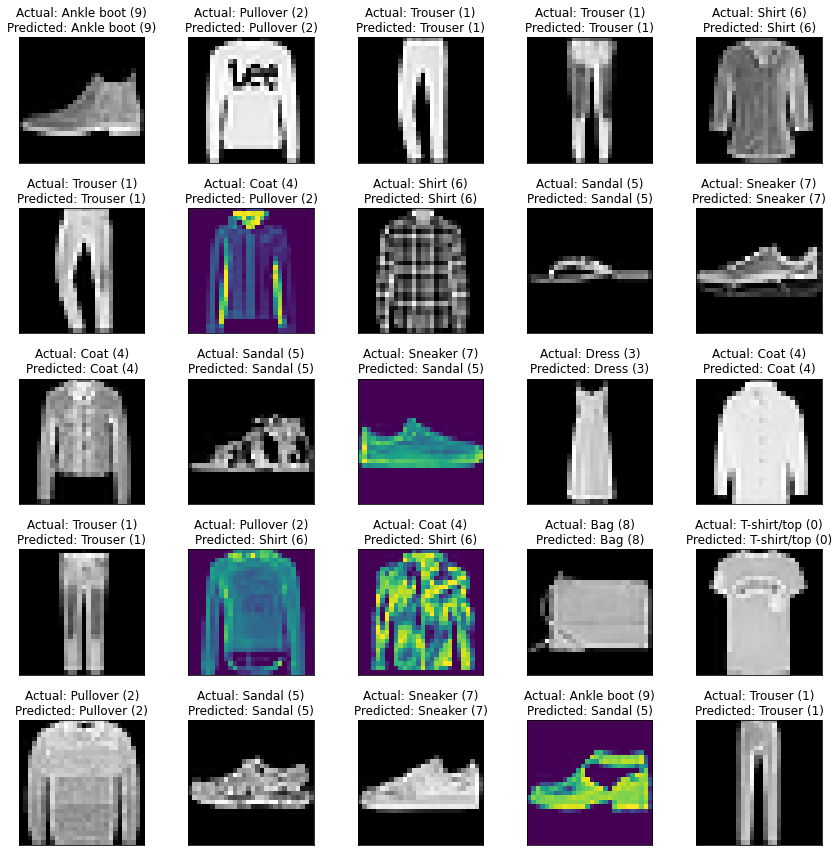

In [26]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (12, 12))

for i, ax in zip(range(25), axes.flatten()):
    
    if actual[i] == prediction[i]:
        ax.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    else:
        ax.imshow(X_test[i].reshape(28, 28))  # Highlight wrong predictions.
        
    ax.title.set_text('Actual: {} ({})\nPredicted: {} ({})'.format(class_names[actual[i]], actual[i],
                                                                   class_names[prediction[i]], prediction[i]))

# Turn off axis ticks for readability.
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()